<a href="https://colab.research.google.com/github/Pontessxx/Fundos-imob_projeto-python/blob/main/machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando a planilha e bibliotecas

In [239]:
""" from google.colab import drive
drive.mount('/content/drive') """

" from google.colab import drive\ndrive.mount('/content/drive') "

In [240]:
#imports das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import clear_output

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

## Projeto mahcine learning - ajuda a compreender fundos imob


### importando e analizando os dados

In [241]:
#importando
df = pd.read_csv('https://raw.githubusercontent.com/Pontessxx/Fundos-imob_projeto-python/main/fundos.csv',delimiter=';')

df['PREÇO ATUAL (R$)'] = df['PREÇO ATUAL (R$)'].str.replace(',', '.')
df['ÚLTIMO DIVIDENDO'] = df['ÚLTIMO DIVIDENDO'].str.replace(',', '.')
df['LIQUIDEZ DIÁRIA (R$)'] = df['LIQUIDEZ DIÁRIA (R$)'].str.replace('.', '').str.replace(',','.')
df['PATRIMÔNIO LÍQUIDO'] = df['PATRIMÔNIO LÍQUIDO'].str.replace('.', '').str.replace(',','.')
df['P/VP'] = df['P/VP'].str.replace(',','.')
#Porcentagem
df['DIVIDEND YIELD'] = df['DIVIDEND YIELD'].str.replace(',', '.').str.replace('%', '')

df['RENTAB. ACUMULADA'] = df['RENTAB. ACUMULADA'].str.replace(',', '.').str.replace('%', ' ')
df['VARIAÇÃO PATRIMONIAL'] = df['VARIAÇÃO PATRIMONIAL'].str.replace(',', '.').str.replace('%', ' ')
df['RENTAB. PATR. PERÍODO'] = df['RENTAB. PATR. PERÍODO'].str.replace(',', '.').str.replace('%', ' ')
df['RENTAB. PATR. ACUMULADA'] = df['RENTAB. PATR. ACUMULADA'].str.replace(',', '.').str.replace('%', ' ')

<ipython-input-241-cd04592bb33a>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-241-cd04592bb33a>:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [242]:

df['DY (3M) ACUMULADO'] = df['DY (3M) ACUMULADO'].str.replace(',', '.').str.replace('%', ' ')
df['DY (6M) ACUMULADO'] = df['DY (6M) ACUMULADO'].str.replace(',', '.').str.replace('%', ' ')
df['DY (12M) ACUMULADO'] = df['DY (12M) ACUMULADO'].str.replace(',', '.').str.replace('%', ' ')

In [243]:
#Raspagem dos dados
df['RENTAB. PERÍODO'] = df['RENTAB. PERÍODO'].str.replace(',','.')
df['RENTAB. PERÍODO'] = df['RENTAB. PERÍODO'].str.replace('%', ' ')

In [244]:
# Converter a coluna  para numerico
df['DIVIDEND YIELD'] = pd.to_numeric(df['DIVIDEND YIELD'], errors='coerce')
df['DY (12M) ACUMULADO'] = pd.to_numeric(df['DY (12M) ACUMULADO'], errors='coerce')
df['DY (6M) ACUMULADO'] = pd.to_numeric(df['DY (6M) ACUMULADO'], errors='coerce')
df['DY (3M) ACUMULADO'] = pd.to_numeric(df['DY (3M) ACUMULADO'], errors='coerce')
df['PREÇO ATUAL (R$)'] = pd.to_numeric(df['PREÇO ATUAL (R$)'], errors='coerce')
df['ÚLTIMO DIVIDENDO'] = pd.to_numeric(df['ÚLTIMO DIVIDENDO'], errors='coerce')
df['LIQUIDEZ DIÁRIA (R$)'] = pd.to_numeric(df['LIQUIDEZ DIÁRIA (R$)'],errors='coerce')
df['P/VP'] = pd.to_numeric(df['P/VP'],errors='coerce')
df['RENTAB. PERÍODO'] = pd.to_numeric(df['RENTAB. PERÍODO'])
df['RENTAB. PATR. PERÍODO'] = pd.to_numeric(df['RENTAB. PATR. PERÍODO'])
df['RENTAB. ACUMULADA'] = pd.to_numeric(df['RENTAB. PERÍODO'])

### mostra a limpagem de linhas e a tabela importada

In [245]:
#mostrando tabela
df.dropna(subset=['PREÇO ATUAL (R$)'], inplace=True)
df.dropna(subset=['DIVIDEND YIELD'], inplace=True)
df.dropna(subset=['RENTAB. PATR. ACUMULADA'], inplace=True)
df

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,RENTAB. PERÍODO,RENTAB. ACUMULADA,PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS
0,AAZQ11,INDEFINIDO,9.36,666358.00,1.01,0.12,1.28,3.59,7.94,10.82,...,1.28,1.28,230646828.88,"9,6","0,98","1,46%",0.00,0.00,0.00,0.0
1,ABCP11,SHOPPINGS,68.95,62040.79,0.74,0.50,0.70,2.10,4.32,8.81,...,-0.25,-0.25,432552807.00,"91,82","0,75","0,65%",-0.18,0.47,7.12,1.0
2,AFHI11,PAPÉIS,97.74,1195518.55,1.01,1.05,1.07,3.30,6.75,13.08,...,0.17,0.17,289711187.37,"94,82","1,03","1,01%",-0.94,0.06,5.00,0.0
4,AIEC11,LAJES CORPORATIVAS,68.70,757731.72,0.72,0.76,1.11,3.27,7.01,13.33,...,-3.69,-3.69,456945283.72,"102,56","0,67","0,73%",0.24,0.98,9.40,2.0
5,ALMI11,LAJES CORPORATIVAS,714.42,45689.15,0.35,0.37,0.00,0.00,0.00,0.00,...,0.00,0.00,225793787.83,"2.046,78","0,35","0,00%",-0.05,-0.05,0.90,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,XPIN11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,84.00,412875.72,0.79,0.65,0.78,2.38,5.06,10.09,...,0.73,0.73,740570598.23,"103,81","0,81","0,63%",-1.37,-0.75,0.75,98.0
364,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,112.75,3785056.31,1.02,0.78,0.69,2.06,4.29,8.72,...,-0.24,-0.24,3017112409.31,"114,49","0,98","0,65%",0.19,0.84,11.47,20.0
365,XPML11,SHOPPINGS,113.39,10126999.24,0.99,0.84,0.77,2.35,4.74,9.41,...,4.97,4.97,3050727984.48,"101,27","1,12","0,76%",-0.66,0.10,6.56,12.0
366,XPPR11,LAJES CORPORATIVAS,22.69,337110.21,0.32,0.10,0.45,1.33,2.58,6.96,...,-0.18,-0.18,515697388.77,"74,77","0,3","0,40%",0.05,0.45,-3.65,5.0


In [246]:
df['FUNDOS'] = df['FUNDOS'].astype(str)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 367
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FUNDOS                   271 non-null    object 
 1   SETOR                    271 non-null    object 
 2   PREÇO ATUAL (R$)         271 non-null    float64
 3   LIQUIDEZ DIÁRIA (R$)     267 non-null    float64
 4   P/VP                     271 non-null    float64
 5   ÚLTIMO DIVIDENDO         271 non-null    float64
 6   DIVIDEND YIELD           271 non-null    float64
 7   DY (3M) ACUMULADO        271 non-null    float64
 8   DY (6M) ACUMULADO        271 non-null    float64
 9   DY (12M) ACUMULADO       271 non-null    float64
 10  DY (3M) MÉDIA            271 non-null    object 
 11  DY (6M) MÉDIA            271 non-null    object 
 12  DY (12M) MÉDIA           271 non-null    object 
 13  DY ANO                   271 non-null    object 
 14  VARIAÇÃO PREÇO           2

## Projeto de machine learnin para Regressão logistica

In [248]:


# Carregue seus dados
data = df

# Limpeza e preparação dos dados
data.dropna(inplace=True)
le = LabelEncoder()
data['SETOR'] = le.fit_transform(data['SETOR'])
data['Melhor Investimento'] = (data['DY (12M) ACUMULADO'] >= 12).astype(int)

# Divisão em conjuntos de treinamento e teste
X = data[['SETOR', 'PREÇO ATUAL (R$)', 'DIVIDEND YIELD','P/VP', 'ÚLTIMO DIVIDENDO','DY (12M) ACUMULADO']]
# X = data[['SETOR', 'PREÇO ATUAL (R$)', 'DIVIDEND YIELD']]
y = data['Melhor Investimento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')


Acurácia do modelo: 0.9814814814814815


In [249]:
# Mapeie os números de volta para as strings originais
df['SETOR'] = le.inverse_transform(df['SETOR'].values)  # Decodificar
setor_occur = df.groupby(df['SETOR']).size()
setor_occur


SETOR
AGÊNCIAS DE BANCOS                   4
EDUCACIONAL                          3
FUNDO DE DESENVOLVIMENTO             9
FUNDO DE FUNDOS                     32
HOSPITALAR                           4
HOTÉIS                               2
IMÓVEIS COMERCIAIS - OUTROS          1
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    33
IMÓVEIS RESIDENCIAIS                 4
INDEFINIDO                          33
LAJES CORPORATIVAS                  41
MISTO                               16
PAPÉIS                              66
SHOPPINGS                           16
VAREJO                               3
dtype: int64

In [250]:
# Adicione uma coluna para indicar se o fundo é um "Melhor Investimento" (DY >= 12)
df['Melhor Investimento'] = (df['DY (12M) ACUMULADO'] >= 13).astype(int)

# Crie um novo DataFrame com as colunas desejadas
df_resultado = df[['FUNDOS', 'Melhor Investimento', 'DY (12M) ACUMULADO']]
fundos_melhores = df[df['Melhor Investimento'] == 1]
fundos_piores = df[df['Melhor Investimento'] == 0]
display(fundos_melhores)

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,RENTAB. ACUMULADA,PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,Melhor Investimento
2,AFHI11,PAPÉIS,97.74,1195518.55,1.01,1.05,1.07,3.30,6.75,13.08,...,0.17,289711187.37,"94,82","1,03","1,01%",-0.94,0.06,5.00,0.0,1
4,AIEC11,LAJES CORPORATIVAS,68.70,757731.72,0.72,0.76,1.11,3.27,7.01,13.33,...,-3.69,456945283.72,"102,56","0,67","0,73%",0.24,0.98,9.40,2.0,1
8,APTO11,IMÓVEIS RESIDENCIAIS,9.90,49012.21,0.94,0.10,1.01,3.16,6.72,13.43,...,0.50,42128729.72,"9,97","0,99","1,00%",-0.78,0.22,13.14,4.0,1
10,ARRI11,PAPÉIS,8.76,277878.07,0.97,0.10,1.13,3.44,7.27,14.95,...,-3.23,117478338.91,"9,1","0,96","1,43%",-2.15,-0.75,-88.87,0.0,1
15,BBFI11B,LAJES CORPORATIVAS,976.03,176899.10,0.46,7.43,0.74,1.92,5.90,13.99,...,-10.27,279197329.42,"2.854,80","0,34","0,93%",0.12,1.06,6.06,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,VGHF11,MISTO,9.54,3280654.41,1.01,0.12,1.25,3.74,7.34,13.43,...,0.62,686848266.32,"9,22","1,03","1,08%",-1.70,-0.64,12.47,0.0,1
335,VGIA11,INDEFINIDO,9.51,5640816.72,1.00,0.13,0.00,2.71,6.97,15.71,...,0.00,821089744.86,"9,5",1,"1,37%",-0.30,1.06,9.29,0.0,1
337,VGIR11,PAPÉIS,9.74,4781281.48,1.02,0.12,1.22,3.85,7.62,15.29,...,2.47,995247970.32,"9,62","1,01","1,35%",-0.20,1.15,-89.14,0.0,1
344,VOTS11,PAPÉIS,82.78,3532.38,0.88,0.75,0.89,2.72,6.77,14.02,...,-2.52,77851965.30,"93,54","0,88","0,92%",-1.44,-0.53,8.00,0.0,1


In [251]:
fundos_melhores.groupby(fundos_melhores['SETOR']).size()


SETOR
AGÊNCIAS DE BANCOS                   1
FUNDO DE DESENVOLVIMENTO             5
HOSPITALAR                           1
HOTÉIS                               2
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS     1
IMÓVEIS RESIDENCIAIS                 1
INDEFINIDO                          19
LAJES CORPORATIVAS                   4
MISTO                                3
PAPÉIS                              34
dtype: int64

In [252]:
fundos_piores.groupby(fundos_piores['SETOR']).size()

SETOR
AGÊNCIAS DE BANCOS                   3
EDUCACIONAL                          3
FUNDO DE DESENVOLVIMENTO             4
FUNDO DE FUNDOS                     32
HOSPITALAR                           3
IMÓVEIS COMERCIAIS - OUTROS          1
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    32
IMÓVEIS RESIDENCIAIS                 3
INDEFINIDO                          14
LAJES CORPORATIVAS                  37
MISTO                               13
PAPÉIS                              32
SHOPPINGS                           16
VAREJO                               3
dtype: int64

### Filtragem de fundos
Aqui foi filtrados fundos os quais possuem DY(12 meses acumulado) acima de 13%, com preços iguais ou menores que R$ 500,00 e um P/VP de 0,8

In [253]:
df = df[(df['DY (12M) ACUMULADO'] >= 13) & (df['ÚLTIMO DIVIDENDO'] >=0.6) &(df['P/VP'] >= 0.8 )  & (df['RENTAB. ACUMULADA'] >= 0)  ]
df

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,RENTAB. ACUMULADA,PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,Melhor Investimento
2,AFHI11,PAPÉIS,97.74,1195518.55,1.01,1.05,1.07,3.30,6.75,13.08,...,0.17,289711187.37,"94,82","1,03","1,01%",-0.94,0.06,5.00,0.0,1
17,BBGO11,INDEFINIDO,92.30,472322.41,0.84,0.92,0.98,4.66,8.50,14.86,...,0.98,392550389.63,"98,01","0,94","1,04%",0.08,1.12,9.31,0.0,1
36,BNFS11,AGÊNCIAS DE BANCOS,121.75,133005.07,1.33,1.49,1.22,3.71,7.58,14.64,...,1.32,64243804.66,"99,22","1,23","1,55%",-0.03,1.51,13.72,18.0,1
69,CPTR11,INDEFINIDO,97.24,1356258.38,0.97,1.20,1.22,3.98,8.25,16.94,...,2.05,407099622.50,"98,38","0,99","1,37%",-0.31,1.06,2.50,0.0,1
90,EGAF11,INDEFINIDO,98.50,907356.66,1.03,1.50,1.50,4.29,8.44,28.38,...,1.24,109513479.76,"98,07",1,"1,22%",0.00,0.00,0.00,0.0,1
107,FLCR11,PAPÉIS,96.64,77383.10,0.98,0.95,0.98,3.27,7.30,13.39,...,2.37,62640460.13,"98,63","0,98","0,91%",-0.68,0.23,8.93,0.0,1
117,GCRA11,INDEFINIDO,89.20,528062.79,0.95,1.10,1.21,3.57,7.57,15.00,...,0.71,171608604.07,"98,01","0,91","1,31%",0.01,1.32,14.22,0.0,1
127,HABT11,PAPÉIS,93.50,1228055.83,0.94,1.00,1.02,3.50,7.86,14.85,...,3.19,806636236.32,"99,8","0,94","0,92%",0.14,1.06,15.75,0.0,1
132,HCRI11,HOSPITALAR,299.92,36557.55,0.96,2.59,0.87,2.95,6.32,14.24,...,15.03,61655370.00,"299,94",1,"0,81%",0.00,0.81,3.06,1.0,1
138,HGCR11,PAPÉIS,106.42,3690201.07,1.02,1.10,1.02,3.21,6.70,13.70,...,3.30,1598887163.80,"101,2","1,05","1,19%",-1.20,-0.03,12.64,0.0,1


### Fundos menores que 100 reais

In [254]:
df[(df['PREÇO ATUAL (R$)'] >= 100)]

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,RENTAB. ACUMULADA,PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,Melhor Investimento
36,BNFS11,AGÊNCIAS DE BANCOS,121.75,133005.07,1.33,1.49,1.22,3.71,7.58,14.64,...,1.32,64243804.66,"99,22","1,23","1,55%",-0.03,1.51,13.72,18.0,1
132,HCRI11,HOSPITALAR,299.92,36557.55,0.96,2.59,0.87,2.95,6.32,14.24,...,15.03,61655370.00,"299,94",1,"0,81%",0.00,0.81,3.06,1.0,1
138,HGCR11,PAPÉIS,106.42,3690201.07,1.02,1.10,1.02,3.21,6.70,13.70,...,3.30,1598887163.80,"101,2","1,05","1,19%",-1.20,-0.03,12.64,0.0,1
155,HTMX11,HOTÉIS,141.29,673493.86,1.02,2.02,1.46,4.33,8.27,13.37,...,4.51,206160754.38,"131,52","1,07","0,97%",-0.42,0.55,7.47,23.0,1
171,JGPX11,INDEFINIDO,100.90,461987.83,1.00,1.41,1.37,3.98,8.02,15.43,...,4.03,81784381.54,"96,43","1,05","1,21%",0.48,1.70,12.76,0.0,1
184,KNCA11,INDEFINIDO,105.75,2900833.79,1.05,1.20,1.13,3.37,7.07,14.50,...,0.46,1441823009.54,"102,26","1,03","1,11%",0.07,1.18,12.58,0.0,1
231,OUJP11,PAPÉIS,101.30,556461.55,1.03,1.10,1.08,3.48,7.42,14.93,...,1.40,321102643.06,"99,94","1,01","1,20%",-1.18,0.01,13.55,0.0,1
271,RBRY11,PAPÉIS,102.04,1268758.62,1.03,1.20,1.18,3.70,7.57,14.11,...,2.46,548266353.36,"99,3","1,03","1,01%",-0.58,0.42,3.41,0.0,1
286,RNDP11,PAPÉIS,152.00,8987.93,0.83,2.00,1.48,10.78,12.57,34.48,...,10.21,19296802.91,"189,52","0,8","0,41%",-40.99,-40.75,-69.57,0.0,1
320,TGAR11,FUNDO DE DESENVOLVIMENTO,122.11,4055983.69,1.04,1.42,1.16,3.43,6.93,13.97,...,0.92,1626948102.10,"114,63","1,07","1,31%",-2.00,-0.72,-0.98,8.0,1


### Selecionando 3 modelos visto o filtro aplicado

In [255]:
valor_aplicado = 1500
num_fundos_na_carteira = 5  # Número mínimo de fundos na combinação
num_combinacoes = 3

In [256]:

# Filtrar os fundos com base no valor mínimo
df = df[df['PREÇO ATUAL (R$)'] <= valor_aplicado // num_fundos_na_carteira]

# Ordenar os fundos pelo preço
df = df.sort_values(by='PREÇO ATUAL (R$)')

# Calcular a quantidade de cotas proporcional para cada fundo
df['Cotas'] = (valor_aplicado // num_fundos_na_carteira) // df['PREÇO ATUAL (R$)']

# Inicializar lista para armazenar as combinações
combinacoes = []

# Encontrar múltiplas combinações
for _ in range(num_combinacoes):
    # Amostrar aleatoriamente 'num_fundos_na_carteira' fundos da lista
    carteira_aleatoria = df.sample(n=num_fundos_na_carteira)

    # Calcular a quantidade de cotas proporcional para cada fundo na carteira
    carteira_aleatoria['Cotas'] = (valor_aplicado // num_fundos_na_carteira) // carteira_aleatoria['PREÇO ATUAL (R$)']

    # Adicionar a carteira à lista de combinações
    combinacoes.append(carteira_aleatoria[['FUNDOS', 'Cotas']])

# Imprimir as combinações
print("Combinações de carteiras:")
for i, carteira in enumerate(combinacoes):
    print(f"Combinação {i + 1}:")
    display(carteira)
    print()

Combinações de carteiras:
Combinação 1:


,FUNDOS,Cotas
17,BBGO11,3.0
205,MCCI11,3.0
257,RBHY11,3.0
233,OURE11,3.0
2,AFHI11,3.0



Combinação 2:


,FUNDOS,Cotas
286,RNDP11,1.0
231,OUJP11,2.0
36,BNFS11,2.0
243,PORD11,3.0
127,HABT11,3.0



Combinação 3:


,FUNDOS,Cotas
217,NAVT11,3.0
17,BBGO11,3.0
184,KNCA11,2.0
256,RBHG11,3.0
90,EGAF11,3.0


### selecione a melhor combinação:

In [257]:
n= 0
combinacao_df = combinacoes[n]


### pegando fiis selecionados

In [258]:


# Acessa apenas a coluna 'FUNDOS' na primeira melhor combinação
fundos_combinacao = combinacao_df['FUNDOS']


# Agora, 'fundos_primeira_combinacao' é uma série contendo os nomes dos fundos da primeira melhor combinação


In [259]:
#Irei pegar desse filtro os fundos para projeções
fiis_selecionados = fundos_combinacao
fiis_selecionados

# Lista para armazenar os códigos de fundo atualizados
fundos_atualizados = []

# Loop através dos fundos
for fundo in fiis_selecionados:
    # Verifica se o código já tem "11" no final
    if not fundo.endswith('11'):
        fundo += '11'  # Adiciona "11" ao final do código
    # Converte para letras maiúsculas e adiciona à lista atualizada
    fundos_atualizados.append(fundo.upper())
fundos_atualizados

['BBGO11', 'MCCI11', 'RBHY11', 'OURE11', 'AFHI11']

### prejetando carteira

In [260]:
# Filtrar as linhas correspondentes aos FIIs selecionados
carteira = df.loc[df['FUNDOS'].isin(fiis_selecionados)]

# Selecionar as colunas desejadas
colunas_selecionadas = ['FUNDOS', 'SETOR', 'PREÇO ATUAL (R$)', 'ÚLTIMO DIVIDENDO','DY (12M) ACUMULADO'] #, 'MAGIC NUMBER'
carteira = carteira[colunas_selecionadas]
carteira = carteira.sort_values(by='FUNDOS')


In [261]:

# cria coluna na carteira contendo o valor da quantidade de cotas visto o valor aplicado
carteira['COTAS COMP.'] = combinacao_df['Cotas']
carteira['DIVIDENDO MENSAL']= carteira['ÚLTIMO DIVIDENDO']*carteira['COTAS COMP.']
carteira['PREÇO ATUAL (R$)'] = carteira['PREÇO ATUAL (R$)'] *carteira['COTAS COMP.']

teste = sum(carteira['PREÇO ATUAL (R$)'])
dividendo_mensal = sum(carteira['DIVIDENDO MENSAL'])
valor_aplicado = valor_aplicado - teste
print(f'VALOR APLICADO: R$ {teste}\nSobra: R$ {np.round(valor_aplicado,2)} \nDIVIDENDO MENSAL: R$ {np.round(dividendo_mensal,2)} ')

VALOR APLICADO: R$ 1394.7
Sobra: R$ 105.3 
DIVIDENDO MENSAL: R$ 14.46 


In [262]:
#mostra a composição da carteira
display(carteira)

,FUNDOS,SETOR,PREÇO ATUAL (R$),ÚLTIMO DIVIDENDO,DY (12M) ACUMULADO,COTAS COMP.,DIVIDENDO MENSAL
2,AFHI11,PAPÉIS,293.22,1.05,13.08,3.0,3.15
17,BBGO11,INDEFINIDO,276.90,0.92,14.86,3.0,2.76
205,MCCI11,PAPÉIS,290.28,0.90,13.15,3.0,2.70
233,OURE11,MISTO,248.10,0.80,14.92,3.0,2.40
257,RBHY11,PAPÉIS,286.20,1.15,15.22,3.0,3.45


In [263]:
carteira_base_plot = carteira.copy()
carteira_base_plot

,FUNDOS,SETOR,PREÇO ATUAL (R$),ÚLTIMO DIVIDENDO,DY (12M) ACUMULADO,COTAS COMP.,DIVIDENDO MENSAL
2,AFHI11,PAPÉIS,293.22,1.05,13.08,3.0,3.15
17,BBGO11,INDEFINIDO,276.90,0.92,14.86,3.0,2.76
205,MCCI11,PAPÉIS,290.28,0.90,13.15,3.0,2.70
233,OURE11,MISTO,248.10,0.80,14.92,3.0,2.40
257,RBHY11,PAPÉIS,286.20,1.15,15.22,3.0,3.45


### projetando carteira anual

In [264]:
#projeção de um ano
carteira_anual = carteira
carteira_anual['COTAS COMP.'] = carteira_anual['COTAS COMP.']*12
carteira_anual['PREÇO ANUAL (R$)'] = carteira_anual['PREÇO ATUAL (R$)']*12
carteira_anual['PREÇO ATUAL (R$)'] = carteira_anual['PREÇO ANUAL (R$)']
ocultar_coluna = [ 'PREÇO ANUAL (R$)']
carteira_anual =carteira_anual.drop(columns=ocultar_coluna)
carteira_anual['DIVIDENDO ANUAL'] = carteira_anual['DIVIDENDO MENSAL']*12
ocultar_coluna = ['DIVIDENDO MENSAL','DY (12M) ACUMULADO']
carteira_anual =carteira_anual.drop(columns=ocultar_coluna)
#Apresenta a tabela anual formatada
display(carteira_anual)

,FUNDOS,SETOR,PREÇO ATUAL (R$),ÚLTIMO DIVIDENDO,COTAS COMP.,DIVIDENDO ANUAL
2,AFHI11,PAPÉIS,3518.64,1.05,36.0,37.80
17,BBGO11,INDEFINIDO,3322.80,0.92,36.0,33.12
205,MCCI11,PAPÉIS,3483.36,0.90,36.0,32.40
233,OURE11,MISTO,2977.20,0.80,36.0,28.80
257,RBHY11,PAPÉIS,3434.40,1.15,36.0,41.40


In [265]:
#Valor aplicado 1 ano
valor_aplicado_anual = np.round(sum(carteira_anual['PREÇO ATUAL (R$)']),2)
dividendo_anual = np.round(sum(carteira_anual['DIVIDENDO ANUAL']),2)
print(f'VALOR APLICADO: R$ {valor_aplicado_anual}\nDIVIDENDO: R$ {dividendo_anual}')

VALOR APLICADO: R$ 16736.4
DIVIDENDO: R$ 173.52


In [266]:
anos_projetados = 20

In [267]:
#Valor e dividendo para os anos selecionados
valor_aplicado_anual = valor_aplicado_anual * anos_projetados
dividendo_anual = dividendo_anual * anos_projetados
print(f'VALOR APLICADO: R$ {valor_aplicado_anual}\nDIVIDENDO: R$ {dividendo_anual}')

VALOR APLICADO: R$ 334728.0
DIVIDENDO: R$ 3470.4


In [268]:
# Crie uma cópia da carteira anual original para usar como base
carteira_anual_base = carteira_anual.copy()

# Lista para armazenar os DataFrames anuais
projetos_anuais = []

# Loop para cada ano projetado
for ano in range(1, anos_projetados + 1):
    # Crie uma cópia da carteira anual para o ano atual
    carteira_anual_copy = carteira_anual_base.copy()

    # Aumente os valores das colunas a cada ano
    carteira_anual_copy['PREÇO ATUAL (R$)'] *= ano
    carteira_anual_copy['COTAS COMP.'] *= ano
    carteira_anual_copy['DIVIDENDO ANUAL'] *= ano

    # Adicione uma coluna 'ANO' com o valor do ano atual
    carteira_anual_copy['ANO'] = ano

    # Adicione esta projeção anual à lista
    projetos_anuais.append(carteira_anual_copy)

# Combine todos os DataFrames anuais em um único DataFrame
projecao_anual_completa = pd.concat(projetos_anuais, ignore_index=True)
projecao_anual_completa = projecao_anual_completa.drop(columns='ÚLTIMO DIVIDENDO')
# Exiba o DataFrame resultante
display(projecao_anual_completa)


,FUNDOS,SETOR,PREÇO ATUAL (R$),COTAS COMP.,DIVIDENDO ANUAL,ANO
0,AFHI11,PAPÉIS,3518.64,36.0,37.80,1
1,BBGO11,INDEFINIDO,3322.80,36.0,33.12,1
2,MCCI11,PAPÉIS,3483.36,36.0,32.40,1
3,OURE11,MISTO,2977.20,36.0,28.80,1
4,RBHY11,PAPÉIS,3434.40,36.0,41.40,1
...,...,...,...,...,...,...
95,AFHI11,PAPÉIS,70372.80,720.0,756.00,20
96,BBGO11,INDEFINIDO,66456.00,720.0,662.40,20
97,MCCI11,PAPÉIS,69667.20,720.0,648.00,20
98,OURE11,MISTO,59544.00,720.0,576.00,20


# Plotagem de gráficos

In [269]:
carteira_base_plot

,FUNDOS,SETOR,PREÇO ATUAL (R$),ÚLTIMO DIVIDENDO,DY (12M) ACUMULADO,COTAS COMP.,DIVIDENDO MENSAL
2,AFHI11,PAPÉIS,293.22,1.05,13.08,3.0,3.15
17,BBGO11,INDEFINIDO,276.90,0.92,14.86,3.0,2.76
205,MCCI11,PAPÉIS,290.28,0.90,13.15,3.0,2.70
233,OURE11,MISTO,248.10,0.80,14.92,3.0,2.40
257,RBHY11,PAPÉIS,286.20,1.15,15.22,3.0,3.45


In [270]:
lista_carteira_base_plot = carteira_base_plot['PREÇO ATUAL (R$)'].tolist()
lista_carteira_base_plot

[293.21999999999997,
 276.9,
 290.28000000000003,
 248.10000000000002,
 286.20000000000005]

In [271]:
# Lista de cores
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

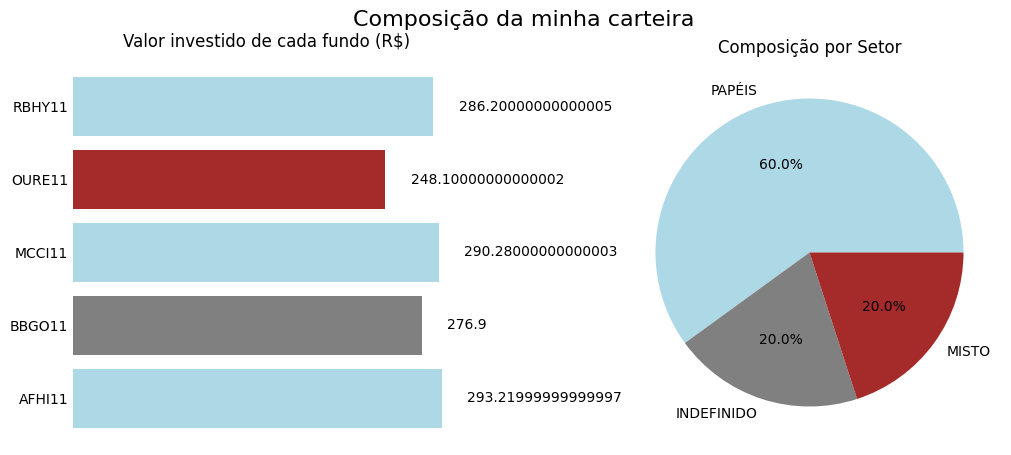

In [272]:
# Criando a figura e os subplots


# Defina um mapeamento de cores com base nos setores
cores = {
    'AGÊNCIAS DE BANCOS': 'royalblue',
    'EDUCACIONAL': 'orange',
    'FUNDO DE DESENVOLVIMENTO': 'forestgreen',
    'FUNDO DE FUNDOS': 'purple',
    'HOSPITALAR': 'orange',
    'HOTÉIS': 'cyan',
    'IMÓVEIS COMERCIAIS - OUTROS': 'magenta',
    'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS': 'yellow',
    'IMÓVEIS RESIDENCIAIS': 'orchid',
    'INDEFINIDO': 'gray',
    'LAJES CORPORATIVAS': 'pink',
    'MISTO': 'brown',
    'PAPÉIS': 'lightblue',
    'SHOPPINGS': 'olive',
    'VAREJO': 'maroon'
}
# Criando a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Gráfico de barras
ax1.barh(carteira_base_plot['FUNDOS'], carteira_base_plot['PREÇO ATUAL (R$)'], color=[cores[setor] for setor in carteira_base_plot['SETOR']])
ax1.set_title('Valor investido de cada fundo (R$)', pad=10)
# Retirando o Frame (retângulo que encobre os gráficos)
ax1.set_frame_on(False)

# Retirando o eixo X
ax1.get_xaxis().set_visible(False)

# Removendo todos os ticks dos eixos X e Y
ax1.tick_params(axis='both', which='both', length=0)
# Adicionando os valores nos gráficos de barras
for i, v in enumerate(carteira_base_plot['PREÇO ATUAL (R$)']):
    ax1.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Subplot 2: Gráfico de pizza
setor_counts = pd.Series(carteira_base_plot['SETOR']).value_counts()
ax2.pie(setor_counts, labels=setor_counts.index, autopct='%1.1f%%', colors=[cores[setor] for setor in setor_counts.index])
ax2.set_title('Composição por Setor', pad=5)

# Adicionando um título geral para os subplots
fig.suptitle('Composição da minha carteira', fontsize=16)

# Ajustando os layouts dos subplots
fig.subplots_adjust(wspace=0.4)

# Mostrando o gráfico
plt.show()

In [273]:
import plotly.express as px

In [279]:
# Suponha que o DataFrame seja chamado projecao_anual_completa
# Certifique-se de que a coluna 'FUNDOS' seja tratada como categorias
projecao_anual_completa['FUNDOS'] = projecao_anual_completa['FUNDOS'].astype('category')

# Crie o gráfico de linha
fig = px.line(
    projecao_anual_completa,
    x='ANO',  # Suponha que você tenha uma coluna 'ANO' em seu DataFrame
    y='DIVIDENDO ANUAL',
    color='FUNDOS',
    labels={'DIVIDENDO ANUAL':'Dividendo Anual (R$)'}
)

# Personalize o layout do gráfico
fig.update_layout(
    title='Projeção Anual de dividendos Fundos',
    xaxis_title='Ano',
    yaxis_title='DIVIDENDO ANUAL'
)

# Exiba o gráfico interativo
fig.show()